## Iris LDA



## Step 1 Importing Libraries and the Dataset

In [1]:
# Import needed packages
# You may add or remove packages should you need them
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
# Set random seed
#np.random.seed(0)


In [2]:
# Load the Iris dataset included with scikit-learn
dataset = load_iris()

# Put data in a pandas DataFrame
df_iris = pd.DataFrame(dataset.data, columns=dataset.feature_names)
# Add target and class to DataFrame
df_iris['target'] = dataset.target

# Step 2 Data Preprocessing

In [3]:
X = df_iris.iloc[:, 0:4].values
y = df_iris.iloc[:, 4].values

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 3 Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Step 4 Performing LDA

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Step 5 Training and Making Predictions

In [7]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

C:\Users\ana.duran\AppData\Local\Continuum\anaconda3\envs\exercisew3d1\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Step 6 Evaluating the Performance

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy1.0


In [9]:
lda = LDA()
df_lda = df_iris.drop(['target'], axis=1,)
lda.fit_transform(df_lda,y)
y_variance = lda.explained_variance_ratio_
df_lda.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
print(y_variance)

[0.9912126 0.0087874]


Text(0.5, 1.0, 'LDA')

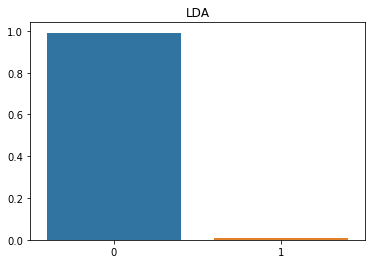

In [11]:
sns.barplot(x=[i for i in range(len(y_variance))], y=y_variance)
plt.title("LDA")

In [12]:
suma = 0
components = 0
for x in y_variance:
    if suma<0.99:
        components +=1
        suma += x
    else:
        print("Components needed =", components)
        print("The sum of those components is", suma)
        

Components needed = 1
The sum of those components is 0.9912126049653671


In [13]:
lda = LDA()
df_lda = df_iris.drop(['petal width (cm)', 'target','petal length (cm)','sepal width (cm)'], axis=1,)
lda.fit_transform(df_lda,y)
y_variance = lda.explained_variance_ratio_
df_lda.head()

,sepal length (cm)
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0


In [14]:
print(y_variance)

[1.]


Text(0.5, 1.0, 'LDA')

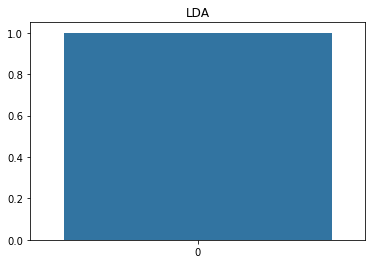

In [15]:
sns.barplot(x=[i for i in range(len(y_variance))], y=y_variance)
plt.title("LDA")

# The end